In [1]:
import imagej
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# initialize ImageJ
ij = imagej.init('sc.fiji:fiji:2.14.0') 
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.14.0/1.54f


In [2]:
import tifffile as tiff
from scipy import ndimage

In [15]:
imp = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\SEM Fe tilsetning og kjølerate\6ps\EDS\Electron Image 2.tif")
ij.IJ.setThreshold(imp, 220, 255)
ij.IJ.run(imp, "Convert to Mask", "")
ij.IJ.run(imp, "Despeckle", "")
original = np.asarray(ij.py.from_java(imp)).astype(np.uint8)
original = original[:768, :]

In [16]:
imp_Fe = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\SEM Fe tilsetning og kjølerate\6ps\EDS\Fe Kα1 Map Data 2.tif")
ij.IJ.run(imp_Fe, "Despeckle", "")
ij.IJ.setThreshold(imp_Fe, 91, 255)
ij.IJ.run(imp_Fe, "Convert to Mask", "")
arrayFe = np.asarray(ij.py.from_java(imp_Fe))

In [17]:
imp_Si = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\SEM Fe tilsetning og kjølerate\6ps\EDS\Si Kα1 Map Data 2.tif")
ij.IJ.run(imp_Si, "Convert to Mask", '125')
arraySi = np.asarray(ij.py.from_java(imp_Si))

In [18]:
Fe_normalized = arrayFe / np.max(arrayFe)

Si_normalized = arraySi / np.max(arraySi)

Fe = Fe_normalized > 0.1
Si = Si_normalized > 0.1

original_mask = original / 255

In [19]:
Si_filled = ndimage.binary_fill_holes(Si)
Si_closed = ndimage.binary_closing(Si_filled, structure=np.ones((20, 20)))

Fe_filled = ndimage.binary_fill_holes(Fe)
Fe_cleaned_up = ndimage.binary_opening(Fe_filled, structure=np.ones((2, 2)))
Fe_closed = ndimage.binary_closing(Fe_cleaned_up, structure=np.ones((10, 10)))


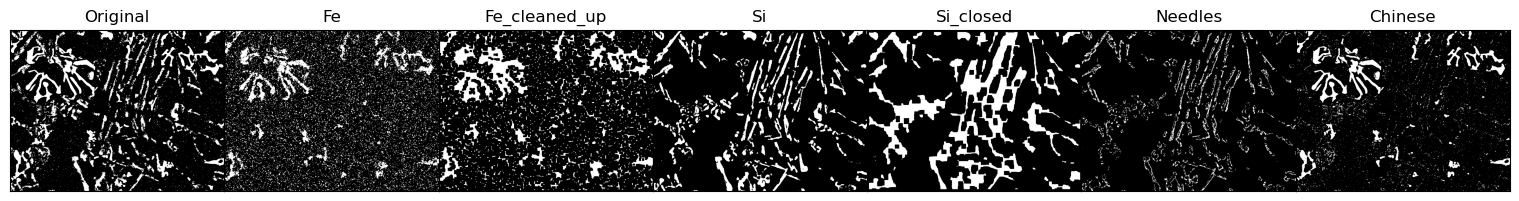

In [20]:
fig, axarr = plt.subplots(1, 7)

axarr[0].imshow(original_mask, cmap ="Greys")
axarr[1].imshow(Fe, cmap ="Greys_r")
axarr[2].imshow(Fe_closed, cmap ="Greys_r")
axarr[3].imshow(Si, cmap = "Greys_r")
axarr[4].imshow(Si_closed, cmap = "Greys_r")
axarr[5].imshow(Si * original, cmap = "Greys_r")
axarr[6].imshow(original - (Si), cmap = "Greys")


axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[2].set_xticks([])
axarr[2].set_yticks([])
axarr[3].set_xticks([])
axarr[3].set_yticks([])
axarr[4].set_xticks([])
axarr[4].set_yticks([])
axarr[5].set_xticks([])
axarr[5].set_yticks([])
axarr[6].set_xticks([])
axarr[6].set_yticks([])

axarr[0].set_title('Original')
axarr[1].set_title('Fe')
axarr[2].set_title('Fe_cleaned_up')
axarr[3].set_title('Si')
axarr[4].set_title('Si_closed')
axarr[5].set_title('Needles')
axarr[6].set_title('Chinese')



fig.subplots_adjust(left=0,bottom=0, right=1, top=1, hspace=0, wspace=0)

fig.set_figheight(3)
fig.set_figwidth(15)
fig.savefig("Comparison_6ps", dpi=300)

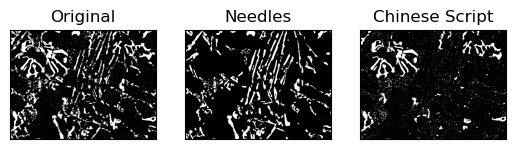

In [21]:
fig, axarr = plt.subplots(1, 3)

axarr[0].imshow(original_mask, cmap = 'Greys')
axarr[1].imshow(Si, cmap = 'Greys_r')
axarr[2].imshow(original - Si, cmap = 'Greys')
#axarr[3].imshow(orig, cmap = 'Greys_r')


axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[2].set_xticks([])
axarr[2].set_yticks([])
#axarr[3].set_xticks([])
#axarr[3].set_yticks([])

axarr[0].set_title('Original')
axarr[1].set_title('Needles')
axarr[2].set_title('Chinese Script')

fig.savefig("Original_Needles_Chinese_6ps", dpi=300)